# Import keras

In [1]:
from keras import layers, models, optimizers, metrics, losses
from keras.datasets import mnist

Using TensorFlow backend.


# Load MNIST dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## Visualize MNIST data

In [3]:
print("train_images.shape", train_images.shape)
print("image shape", train_images[0].shape)
print("train_labels.shape", train_labels.shape)
print("len(train_labels)", len(train_labels))

print("test_images.shape", test_images.shape)
print("image shape", test_images[0].shape)
print("test_labels.shape", test_labels.shape)
print("len(test_labels)", len(test_labels))

train_images.shape (60000, 28, 28)
image shape (28, 28)
train_labels.shape (60000,)
len(train_labels) 60000
test_images.shape (10000, 28, 28)
image shape (28, 28)
test_labels.shape (10000,)
len(test_labels) 10000


In [4]:
train_labels[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [5]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0], cmap='gray')
plt.show()

## Save datasets for further usages

In [6]:
ori_train_images = train_images.copy()
ori_train_labels = train_labels.copy()

ori_test_images = test_images.copy()
ori_test_labels = test_labels.copy()

# Train a digit recognizer
## Approach 01: Use fully connected neural network

### Design your fully connected neural network

In [7]:
net = models.Sequential()
net.add(layers.Dense(512, activation='relu', input_shape=(28 * 28, )))
net.add(layers.Dense(10, activation='softmax')) # 10 outputs for [0, 9]

net.compile(optimizer=optimizers.RMSprop(), 
            loss=losses.categorical_crossentropy,
            metrics=[metrics.categorical_accuracy])

### Format the image data and labels

In [8]:
train_images = train_images.reshape((60000, 28 * 28)) # Reshape an image to [1, 28 * 28]
train_images = train_images.astype("float32") / 255 # Scale to [0, 1]

test_images = test_images.reshape((10000, 28 * 28)) # Reshape an image to [1, 28 * 28]
test_images = test_images.astype("float32") / 255 # Scale to [0, 1]


In [9]:
from keras.utils import to_categorical

train_labels = to_categorical(ori_train_labels)
test_labels = to_categorical(ori_test_labels)

In [10]:
print("train_images.shape", train_images.shape)
print("image shape", train_images[0].shape)
print("train_labels.shape", train_labels.shape)
print("train_labels\n", train_labels)
print("train_labels[0]", train_labels[0])

train_images.shape (60000, 784)
image shape (784,)
train_labels.shape (60000, 10)
train_labels
 [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]]
train_labels[0] [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


In [11]:
history = net.fit(train_images, 
                  train_labels, 
                  epochs=10,
                  batch_size=128,
                  validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.2558 - categorical_accuracy: 0.9255 - val_loss: 0.1421 - val_categorical_accuracy: 0.9569
Epoch 2/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.1043 - categorical_accuracy: 0.9693 - val_loss: 0.0953 - val_categorical_accuracy: 0.9709
Epoch 3/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.0682 - categorical_accuracy: 0.9796 - val_loss: 0.0955 - val_categorical_accuracy: 0.9708
Epoch 4/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.0504 - categorical_accuracy: 0.9852 - val_loss: 0.0745 - val_categorical_accuracy: 0.9772
Epoch 5/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.0371 - categorical_accuracy: 0.9886 - val_loss: 0.0723 - val_categorical_accuracy: 0.9779
Epoch 6/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.0285 - categor

### Visualize the accuracy & loss

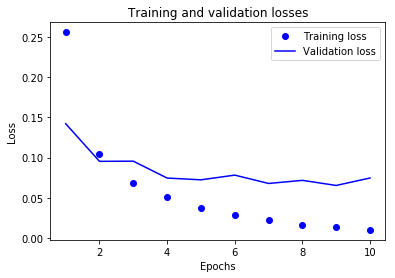

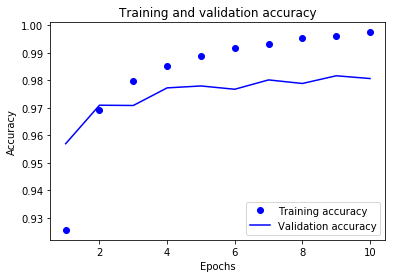

In [12]:
import matplotlib.pyplot as plt

history_dict = history.history

train_acc = history_dict['categorical_accuracy']
train_loss = history_dict['loss']

val_acc = history_dict['val_categorical_accuracy']
val_loss = history_dict['val_loss']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure()

plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Use the latest model to evaluate the test data

In [13]:
results = net.evaluate(test_images, test_labels)
print(results)

10000/10000 [==============================] - 0s 45us/step
[0.07459176515454892, 0.98060000000000003]


### Use the latest model to predict the data without labels

In [14]:
import numpy as np
results = net.predict(test_images)

print("1st predict results: \n", results[0])
print("1st predict label: \n", np.argmax(results[0]))

1st predict results: 
 [  2.17556823e-11   4.40925965e-15   9.62024131e-08   5.46123204e-07
   1.46268544e-17   1.45914072e-10   7.39304418e-18   9.99999404e-01
   2.16408158e-09   1.24641240e-08]
1st predict label: 
 7


## Approach 02: Convolutional neural network

### Format the dataset

In [7]:
from keras.utils import to_categorical
train_images = ori_train_images.copy()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
train_labels = to_categorical(ori_train_labels.copy())

test_images = ori_test_images.copy()
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
test_labels = to_categorical(ori_test_labels.copy())

print("train_images.shape", train_images.shape)
print("image shape", train_images[0].shape)
print("train_labels.shape", train_labels.shape)
print("train_labels\n", train_labels)
print("train_labels[0]", train_labels[0])

train_images.shape (60000, 28, 28, 1)
image shape (28, 28, 1)
train_labels.shape (60000, 10)
train_labels
 [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]]
train_labels[0] [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


### Design model

In [8]:
net = models.Sequential()
net.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))) # need 4D tensor so we need (batch, 28, 28, 1)
net.add(layers.MaxPool2D((2, 2)))        
net.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
net.add(layers.MaxPooling2D(pool_size=(2, 2)))
net.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
net.add(layers.Flatten())
net.add(layers.Dense(64, activation='relu'))
net.add(layers.Dense(10, activation='softmax'))
        
net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

### Train

In [9]:
net.compile(optimizer=optimizers.Adam(), 
            loss=losses.categorical_crossentropy,
            metrics=[metrics.categorical_accuracy])

In [10]:
history = net.fit(train_images, 
                  train_labels, 
                  epochs=10,
                  batch_size=64,
                  validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.1856 - categorical_accuracy: 0.9442 - val_loss: 0.0556 - val_categorical_accuracy: 0.9819
Epoch 2/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.0513 - categorical_accuracy: 0.9841 - val_loss: 0.0394 - val_categorical_accuracy: 0.9864
Epoch 3/10
60000/60000 [==============================] - 7s 124us/step - loss: 0.0357 - categorical_accuracy: 0.9889 - val_loss: 0.0316 - val_categorical_accuracy: 0.9907
Epoch 4/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.0286 - categorical_accuracy: 0.9911 - val_loss: 0.0307 - val_categorical_accuracy: 0.9900
Epoch 5/10
60000/60000 [==============================] - 8s 125us/step - loss: 0.0222 - categorical_accuracy: 0.9926 - val_loss: 0.0338 - val_categorical_accuracy: 0.9887
Epoch 6/10
60000/60000 [==============================] - 8s 125us/step - loss: 0.0185 - c

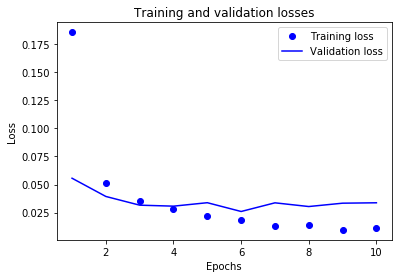

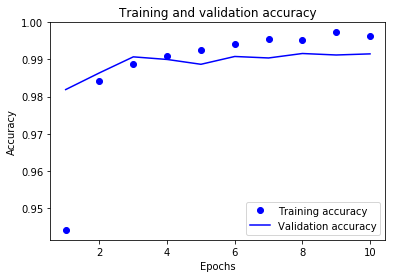

In [11]:
import matplotlib.pyplot as plt

history_dict = history.history

train_acc = history_dict['categorical_accuracy']
train_loss = history_dict['loss']

val_acc = history_dict['val_categorical_accuracy']
val_loss = history_dict['val_loss']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure()

plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Evaluate test set with the latest model

In [12]:
results = net.evaluate(test_images, test_labels)
print(results)

10000/10000 [==============================] - 1s 71us/step
[0.033730055816793898, 0.99150000000000005]
